# Part 2.2
Train a model to detect MNIST
Be "creative with your model definitions

In [ ]:
# = Import things
import torch
import torch.nn as nn
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
# = Definition
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Loss function definition
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer definition
optimizer = tf.keras.optimizers.Adam()

844/844 [==============================] - 3s 4ms/step - loss: 0.0600 - accuracy: 0.9823 - val_loss: 0.0849 - val_accuracy: 0.9730


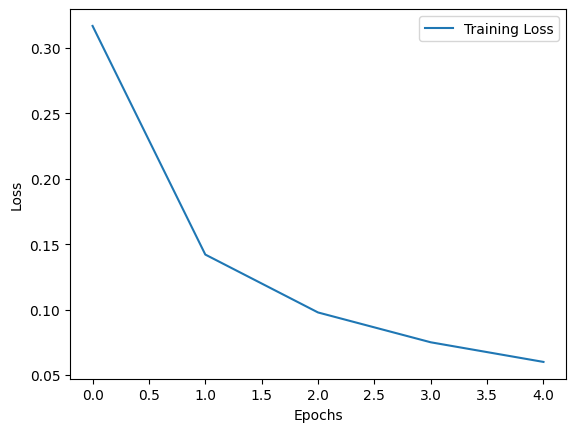

In [ ]:
# Load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

losses_over_time = []
# Training loop
for epoch in range(5):  # Specify the number of epochs
    history = model.fit(train_images, train_labels, epochs=1, batch_size=64, validation_split=0.1)
    losses_over_time.append(history.history['loss'][0])  # Append the training loss value

# Plot the loss_over_time graph
plt.plot(losses_over_time, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model to .pth
model.save('/path/to/save/model')

# Part 2.3
Do write a lot of code snippets to make sure that things are correct.

Leave them here so that we could see that you have tried



In [ ]:
#I don't know how to create an annotations file effectively
import os
import csv
from google.colab import files

def generate_annotations_file(directory, output_file):
    # Get the list of file names in the directory
    file_names = sorted(os.listdir(directory))

    # Create a list to store image paths and labels
    annotations = [(os.path.join(directory, file), idx) for idx, file in enumerate(file_names)]

    # Write the annotations to a CSV file
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['image_path', 'label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for annotation in annotations:
            writer.writerow({'image_path': annotation[0], 'label': annotation[1]})

# Upload files to Colab
uploaded_files = files.upload()

# Use the uploaded file(s) in your code
directory_path = '.'  # Assuming the uploaded file is in the current directory
output_csv_file = 'annotations.csv'

generate_annotations_file(directory_path, output_csv_file)


Saving 3.jpg to 3.jpg
Saving 10.jpg to 10.jpg
Saving 13.jpg to 13.jpg
Saving 25.jpg to 25.jpg
Saving 28.jpg to 28.jpg
Saving 55.jpg to 55.jpg
Saving 69.jpg to 69.jpg
Saving 71.jpg to 71.jpg
Saving 101.jpg to 101.jpg
Saving 126.jpg to 126.jpg
Saving 136.jpg to 136.jpg
Saving 148.jpg to 148.jpg
Saving 157.jpg to 157.jpg
Saving 183.jpg to 183.jpg
Saving 188.jpg to 188.jpg
Saving 192.jpg to 192.jpg
Saving 194.jpg to 194.jpg
Saving 215.jpg to 215.jpg
Saving 246.jpg to 246.jpg
Saving 269.jpg to 269.jpg
Saving 271.jpg to 271.jpg
Saving 294.jpg to 294.jpg
Saving 296.jpg to 296.jpg
Saving 297.jpg to 297.jpg
Saving 305.jpg to 305.jpg
Saving 311.jpg to 311.jpg
Saving 312.jpg to 312.jpg
Saving 324.jpg to 324.jpg
Saving 327.jpg to 327.jpg
Saving 346.jpg to 346.jpg
Saving 365.jpg to 365.jpg
Saving 372.jpg to 372.jpg
Saving 380.jpg to 380.jpg
Saving 407.jpg to 407.jpg
Saving 424.jpg to 424.jpg
Saving 440.jpg to 440.jpg
Saving 441.jpg to 441.jpg
Saving 443.jpg to 443.jpg
Saving 459.jpg to 459.jpg
Savi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset and DataLoader
Follow this link https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
- Define the Dataset Class with 3 functions to get item
- Use the Dataloader in the training loop
- Iterate through the dataloader in the training loop

In [ ]:
# Define dataset class with 3 functions to get item
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Define paths to your training and test data directories
training_img_dir = r'C:\Users\User\OneDrive\Pictures\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - training\0'
test_img_dir = r'C:\Users\User\OneDrive\Pictures\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - testing\0'

# CustomImageDataset for training data
training_dataset = CustomImageDataset(img_dir=training_img_dir)

# CustomImageDataset for test data
test_dataset = CustomImageDataset(test_img_dir)

# Example: Accessing the first image and label in the training dataset
image, label = training_dataset[0]

# Display the image using matplotlib
plt.imshow(image.permute(1, 2, 0))  # Assuming image is a torch tensor with shape (C, H, W)
plt.title(f"Label: {label}")
plt.show()


TypeError: CustomImageDataset.__init__() missing 1 required positional argument: 'annotations_file'

In [ ]:
# Use the Dataloader in the training loop
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# Iterate through the dataloader in the training loop
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")